# Monty Hall Simulation

## Author - Geoff Ball

## Introduction

This notebook contains a Monty Hall simulation that examines the case for the two suggested strategies, switching or not switching. Switching is known to be the best strategy, but I approached this project as if the answer were not know and needed to be tested.

### The Game

The Monty Hall game is a guessing game where a player is presented with three doors and the player must choose which door to open.  Behind one door is a prize, for instance a car, and behind the other doors are something else, in this case a goat.  The goal is to find the car and win.

The game progresses as follows.  In the first move of the game the car and goats are placed behind the doors, this can be random, and no information is passed on to the player.  In the second move, the player chooses one of the doors, since the player has no information, this pick is a good as random.  With the third move the game gets interesting.  In the third move, the host opens one of the doors that the contestant did not choose, necessarily one without a prize behind it.  If the player initially chose the door with the prize behind it, the host can open either remaining door, but if the player chose a door without a prize, then the host must open the other door without a prize.

Now the player must consider a strategy.  At this point in the game the player is allowed to keep their chosen door, or switch to the remaining unopened door.  What should the player do?  Does one strategy have a better chance of winning than the other?

Once the player make the final choice, the chosen door is opened and the game ends with the player winning if the prize is revealed and losing if it is not.

### Simulation

The following code attempts to demonstrate the best strategy by comparing the results of repeated simulations to determine which has the best chance of winning.

In [1]:
# import necessary modules
import random as rd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

%matplotlib inline

### Set Up

The function in the code block below runs one Monty Hall game.  The car is placed randomly behind a door, a contestant randomly chooses a door, Monty Hall reveals a door, and the contestant then either switches or doesn't, finally the contestant is determined to have either won or lost.  The function takes one input, _strat_, which determines the contestants strategy.  A dictionary is returned with keys being the doors, player choices, Monty Hall's choice, and the result.

In [2]:
# Monty Hall Function, accepts arguments of 'switch' or 'no_switch'
def Game(strat):

       
        #place the car and goats in a dictionary     
        random_generator1 = np.random.RandomState() # ensure independent random seed
        door = random_generator1.randint(1, 4) #pick car position
        
        doors = ['door_1', 'door_2', 'door_3'] # List of doors
    
        # create the dictionary to place the car behind a door
        d = {}    
        for i in range(1, 4, 1):
            if door == i:
                d['door_%d' % i] = 'car'
            else:
                d['door_%d' % i] = 'goat'
    
      
        # Contestant Chooses a Door
    
        random_generator2 = rd.Random() # ensure independent random seed
        pick = random_generator2.choice(doors)
        
        doors.remove(pick)
 
        # Monty Hall decides which door to open, based on contestant choice and car placement
        if d.get(pick) == 'car':
            reveal = rd.choice(doors)
            
        elif d.get(pick) == 'goat':
            for x in doors:
                reveal = x
                if (d.get(x) != 'car'): break

        doors.remove(reveal)
       
        # contestant makes a second pick based on the chosen strategy
        if strat == 'no_switch':
            second_pick = pick

        elif strat == 'switch':
            second_pick = doors[0] 
            
            
        # Determine if contestant wins      
        if d.get(second_pick) == 'car':
            result = 'Win!'
        else:
            result = 'Lose'        
        
        #Create a dictionary of results
        Monty_Hall = {'door_1': d.get('door_1'), 'door_2': d.get('door_2'), 'door_3': \
                      d.get('door_3'), '1st_pick': pick, 'reveal': reveal, \
                      '2nd_pick': second_pick, 'result': result}
                
        
        # Return dictionary of output
        return Monty_Hall

### One Attempt

The following block of code demonstrates the Monty Hall game in the above function.  It calls the function _Game_ with a strategy of 'switch' and prints the result.  Because the placement of the car, the players first choice, and potentially, Monty's reveal, are random, running the code block repeatedly will get different results.

In [3]:
x = Game('switch')
Result = pd.DataFrame(columns = ['Value'])
for i in x:
    Result.loc[i] = [x.get(i)]
print (Result)

           Value
door_1      goat
door_2       car
door_3      goat
1st_pick  door_3
reveal    door_1
2nd_pick  door_2
result      Win!


### Multiple Attempts

The function below creates a loop that plays the Monty Hall game a set number of times and returns a data frame with the results of each game.  It takes the arguments _games_, where it is told how many times to play the game, and _strategy_ which it passes through to the _Game_ function.

In [4]:
# Create a loop that play the game multiple times.
def Tries(games, strategy):
    loop = 0
    #Create a DataFrame to store the results
    Monty_Hall = pd.DataFrame(index = range(0, games - 1), \
                    columns =['door_1', 'door_2', 'door_3', '1st_pick', 'reveal', '2nd_pick', 'result'])
    
    while loop < games: #Start the loop
        # Get the dictionary of results from a single game
        temp = Game(strategy)
        # Write the results of the current game to the DataFrame
        for i in temp:
            Monty_Hall.loc[loop, i] = temp.get(i)
        
        loop += 1
    return Monty_Hall # Return the DataFrame of results
        

Now we call the above function as see what the results of repeated games are.  We play one hundred games with a strategy of 'switch' and then display the results in terms of number of games won and number of games lost.  Again, running the code block repeatedly will yield different results each time.

In [5]:
x = Tries(100, 'switch')
print (x['result'].value_counts())

Win!    75
Lose    25
Name: result, dtype: int64


### Repeated Simulations

The central limit theorem says, in brief, that the distribution of a large number sample means will be normal and that the mean of the distribution will be the true mean.  The function below takes advantage of that fact.

The function _Distribution_ creates a loop that calls the _Tries_ function multiple time. It takes three arguments, _iterations_, how many times to call the _Tries_ function, _games_, how many times to play the game each iteration, and _strategy_, whether to switch or not.  The larger the number of iterations, the more closer our sample mean will be to the true mean.

The function returns a data frame of normalized value counts of wins and losses for each iteration.

In [6]:
def Distribution(iterations, games, strategy):

    Probability = pd.DataFrame(index = range(0, iterations - 1), columns=['Win%', 'Loss%'], dtype = 'float')

    attempt = 0

    while attempt < iterations:
        Monty_Hall = Tries(games, strategy)
        prob = Monty_Hall['result'].value_counts(normalize = True)
        prob = prob.to_dict()
        
        # Write to DataFrame
        Probability.loc[attempt, 'Win%'] = prob.get('Win!')
        Probability.loc[attempt, 'Loss%'] = prob.get('Lose')
        
        attempt += 1
    
    return Probability
    

### Putting it all Together

Now we put it all together. Below, we choose the number of time to play the game each iteration, the number of iterations, and the strategy.  We can run the code multiple times in different with different choices and see how the results change.

We begin by trying the strategy 'no_switch'.

### The Case for Not Switching

The case for not switching often goes like this:  The second choice is between two doors, so it is a 50-50 proposition.  There is no advantage to switching or not switching so you might as well stick to your first guess.

The following will test that theory, if true, we would expect to see the player win fifty percent of the time.

In [7]:
############
## Inputs ##
############

# How many games to play the game each simulation. For example '10' will play the game 10 times
games = 100

# How many times to run the simulation.  For example '10' will run the simulation 10 times 
# WARNING: the game will be played a total of games*iterations times so values of 10 and 10 
# mean a total of 100 games, larger numbers can become time consuming very quickly
iterations = 1000

# What strategy to use, can only take on the values 'switch' and 'no_switch'
strategy = 'no_switch'

# Run the entire code
Probability_ns = Distribution(iterations, games, strategy)

Text(0, 0.5, 'Count')

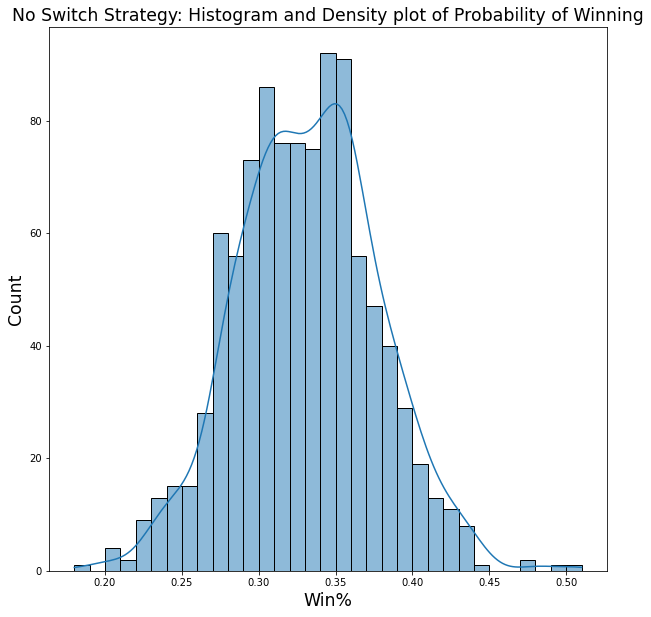

In [8]:
# A histogram of the output
ax = plt.figure(figsize=(10, 10)).gca() # define axis
sbs.histplot(Probability_ns, x = 'Win%', binwidth = 0.01, kde = True, ax = ax)
ax.set_title('No Switch Strategy: Histogram and Density plot of Probability of Winning', \
            fontsize = 'xx-large')# Give the plot a main title
ax.set_xlabel('Win%', fontsize = 'xx-large')# Set text for the x axis
ax.set_ylabel('Count', fontsize = 'xx-large')# Set text for y axis

In [9]:
x = Probability_ns.describe()
x = x.drop(columns = ['Loss%'], index = ['std', '25%', '50%', '75%'])
x.loc['varience'] = Probability_ns.loc[:, 'Win%'].var()
x = x.reindex(['count', 'mean', 'varience', 'min', 'max'])
x

,Win%
count,1000.000000
mean,0.332990
varience,0.002092
min,0.180000
max,0.510000


#### Not Switching Analysis

The results do not look good for not switching.  After playing 100 games 1,000 times, the histogram centered near 33%.  While you will be looking at a unique histogram based on a new simulation, the one I am looking at right now has a mean of about 33 wins per 100 games, a variance of about 0.002, a minimum number of wins of 18 and a maximum number of wins of 51. After 1,000 attempts, the maximum number of wins in each trial of 100 is barely the 50 that would support the not switching strategy.  While your numbers will be slightly different, winning more than 50% of the time using this strategy is extremely rare.

### Switch Strategy

We now turn our attention to the switch strategy.  The case for switching goes something like this:  On your initial guess you have a one in three chance of picking the correct door, so there is a two in three chance that the winning door is one you have not chosen.  After a door is open, the probability that your first choice was wrong, has not changed therefor there is a one in three chance that the car is behind the door you chose, but a two in three chance that the car is behind the remaining door.

The following simulation will test the switch strategy.

In [10]:
############
## Inputs ##
############

# How many games to play the game each simulation. For example '10' will play the game 10 times
games = 100

# How many times to run the simulation.  For example '10' will run the simulation 10 times 
# Warning, the game will be played a total of games*iterations times so values of 10 and 10 
#mean a total of 100 games, this can become time consuming very quickly
iterations = 1000

# What strategy to use, can only take on the values 'switch' and 'no_switch'
strategy = 'switch'

# Run the entire code
Probability_s = Distribution(iterations, games, strategy)

Text(0, 0.5, 'Count')

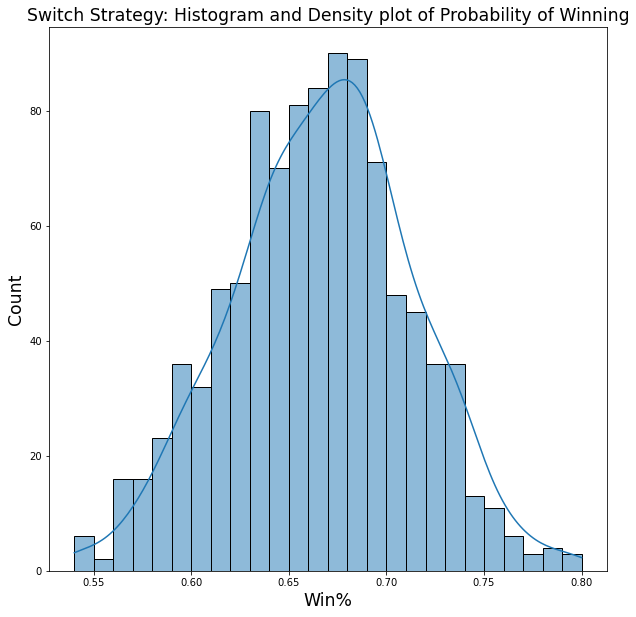

In [11]:
# A histogram of the output
ax = plt.figure(figsize=(10, 10)).gca() # define axis
sbs.histplot(Probability_s, x = 'Win%', binwidth = 0.01, kde = True, ax = ax)
ax.set_title('Switch Strategy: Histogram and Density plot of Probability of Winning', \
            fontsize = 'xx-large')# Give the plot a main title
ax.set_xlabel('Win%', fontsize = 'xx-large')# Set text for the x axis
ax.set_ylabel('Count', fontsize = 'xx-large')# Set text for y axis

In [12]:
x = Probability_s.describe()
x = x.drop(columns = ['Loss%'], index = ['std', '25%', '50%', '75%'])
x.loc['varience'] = Probability_s.loc[:, 'Win%'].var()
x = x.reindex(['count', 'mean', 'varience', 'min', 'max'])
x

,Win%
count,1000.000000
mean,0.668030
varience,0.002161
min,0.540000
max,0.800000


# Switching Analysis

Te results for the switch strategy are much more promising.  Again, keep in mind that the results you are seeing will differ slightly from mine, due to the random nature of the simulations. In the results that I am looking at, across 1,000 simulations of 100 games, the mean probability of winning is about 67% while the variance is 0.002, the minimum number of wins is 54 and the maximum is 80.  It is likely that the results you are seeing are similar.

### Comparison and Recommendation 

Between the strategies 'switch' and 'no_switch', there appears to be a clear winner.  According to the simulations, you will win twice as often if you switch compared to how often you will win if you do not.  In addition, the case for switching is supported by the statistics, verses the case for not switching which is based on a misunderstanding of conditional probabilities.

Ultimately, the recommendation must be to use the strategy 'switch'.

### References

I was getting a weird result where the random placement of the car and the random first pick were the same about two thirds of the time.  While I cannot say for sure why this would be happening, it seems that using a default random seed means that the two random numbers are not independent. Implementing code from the link fixed the problem.

https://stackoverflow.com/questions/24204582/generate-multiple-independent-random-streams-in-python